# The Good, The Bad, and The Ugly

**Cast**:  Meysam Hashemi, Marmaduke woodman, Anirudh nihalani

**Screenplay**: Andrew Gelman, Aki Vehtari

**Director**: Viktor Jirsa , Marmaduke woodman

**Producer**: Viktor Jirsa    

Summary: using the effect of prior std on WAIC and PSIS-LOO, we want to infer The Good, The Bad, and The Ugly prior.

Since WAIC and PSIS-LOO are fully Bayesian, we can use them to compare priors whereas other information criteria  such as AIC, BIC have not this capability by their definition.

The application is to compare (accept or reject) the clinical hypothese on epileptogenetic brain zones. 


In [1]:
import os
import sys
import errno
import time
from numpy import *
from pylab import *
from scipy import *
from matplotlib.pyplot import *
import matplotlib.pyplot as plt


import pystan

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from IPython.display import HTML

In [3]:
%pylab inline
#%matplotlib notebook
plt.style.use('seaborn-talk');

Populating the interactive namespace from numpy and matplotlib


/home/meysam/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['arctanh', 'sqrt', '__version__', 'log10', 'show_config', 'linalg', 'log', 'power', 'log2', 'arcsin', 'test', 'fft', 'arccos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
Mainpath = '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/'

# Generate Synthetic Data

In [5]:
a = 5
b = 5
c=5
sigma=1
random.seed(11442)
noise =sigma * randn() 

In [6]:
nt = 100
t = linspace(-5, 5, nt)
y = a*(t**2)+b*t+c
y_model = y+sigma*randn(y.size)

In [7]:
nt_outl=0
t_outl=linspace(5, 6, nt_outl)
y_outl=35*t_outl

In [8]:
nt_obs=nt+nt_outl
t_obs=concatenate((t,t_outl), axis=0)
yobs=concatenate((y_model,y_outl), axis=0)

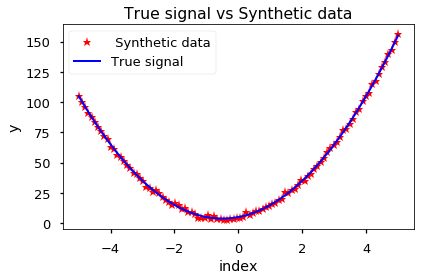

In [9]:
figure(figsize=(6, 4))
plot(t_obs,yobs,'r*', label=' Synthetic data' )
plot(t,y, color='b', linewidth=2.0, label='True signal')
xlabel("index")
ylabel("y")
title('True signal vs Synthetic data')
legend()
tight_layout()
show() 

# Generate 1-D SweepData (for sd) to run Stan

In [10]:
data_input= {'nt': nt_obs, 't': t_obs, 'yobs': yobs}


nd=[]
npz = {'nd': nd}
npz.update(data_input)

savez('data_input.npz', **npz)
savez('data_input.R.npz', **npz)
pystan.stan_rdump(data_input, 'data_input.R')

In [11]:
cwd = os.getcwd()
cwd

'/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos'

In [12]:
data_input = dict(load('data_input.R.npz'))

#data = pystan.read_rdump('data.R')

In [13]:
sd_value=0.0

In [14]:
data_dict= {'nt': nt_obs, 'sd_value': sd_value, 't': t_obs, 'yobs': yobs}


nd=[]
npz = {'nd': nd}
npz.update(data_dict)

savez('data_input.npz', **npz)
savez('data_input.R.npz', **npz)
pystan.stan_rdump(data_dict, 'data_input.R')

In [15]:
filename = "data_input"

if filename in os.listdir(cwd):
    print('Directory Exists')
        
if not os.path.exists(os.path.join(cwd, filename)):
    try:
        os.mkdir(os.path.join(cwd, filename))
    except OSError as exception: 
        if exception.errno != errno.EEXIST:
            raise

In [16]:
cwd_datainput= os.path.join(cwd, filename)

In [17]:
npz.update(data_dict)

sd_values=array([0.01, 0.025, 0.05, 0.1,  0.25,  0.5,   1.0 ,  10., 100.0, 1000.0])


idx_R=0
for i in range(1,len(sd_values)+1):
                npz.update({"sd_value":  sd_values [i-1]})
                idx_R= idx_R+1
                "data_input" + str(idx_R) + ".R.npz"
                "data_input%s.R.npz" % idx_R
                file_name_npz="data_input{}.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_npz), **npz)
                
                file_name_Rnpz="data_input{}.R.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_Rnpz), **npz)
                
                file_name_R="data_input{}.R".format(idx_R)
                os.chdir(cwd_datainput)
                pystan.stan_rdump( npz, file_name_R)
  

In [18]:
%cd ..

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos


# The Good, The Bad, The Ugly

The Hypo Good: p1, p2, p3 ~ normal(mu_true, sd) 
    
The Hypo Bad:  p1, p2, p3 ~ normal(mu_wrong, sd) 
        
The Hypo Ugly: p2, p1~normal(mu_true, sd);  p0~normal(mu_wrong, sd);

In [19]:
!ls

checking_converged_advi.py  data_input	      parse_csv.py
checking_converged_hmc.py   data_input.npz    PolynomialInferHypos.ipynb
checking_converged_opt.py   data_input.R      RunCVHypos2D.sh
cmdstan			    data_input.R.npz  RunCVHypos.sh
ComputeIC_Hypos_csv.py	    HypoBad.stan      RunICHypos2D.sh
ComputeIC_Hypos.py	    HypoGood.stan     RunICHypos.sh
ComputePSIS_Hypos_csv.py    Hypos2D.stan      RunPyStan4IC.py
ComputePSIS_Hypos.py	    HypoUgly.stan


In [20]:
tic=time.time()
!./RunICHypos.sh 
print('total running time is: ', time.time()- tic, 'second')

1  /  3  :  HypoBad
...Running Pystan...
Running data_input1 started...
Running chain1 started...
..............................................
creating model ...
DIAGNOSTIC(S) FROM PARSER:
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4169316d3905a6d971b1184c56b618ea NOW.
INFO:pystan:OS: linux, Python: 3.6.3 |Anaconda, Inc.| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0], Cython 0.26.1
Compiling /tmp/tmpur1bff1x/stanfit4anon_model_4169316d3905a6d971b1184c56b618ea_6367174593122325526.pyx because it changed.
[1/1] Cythonizing /tmp/tmpur1bff1x/stanfit4anon_model_4169316d3905a6d971b1184c56b618ea_6367174593122325526.pyx
building 'stanfit4anon_model_4169316d3905a6d971b1184c56b618ea_6367174593122325526' extens

g++ -pthread -shared -B /home/meysam/anaconda3/compiler_compat -L/home/meysam/anaconda3/lib -Wl,-rpath=/home/meysam/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ /tmp/tmpur1bff1x/tmp/tmpur1bff1x/stanfit4anon_model_4169316d3905a6d971b1184c56b618ea_6367174593122325526.o -L/home/meysam/anaconda3/lib -lpython3.6m -o /tmp/tmpur1bff1x/stanfit4anon_model_4169316d3905a6d971b1184c56b618ea_6367174593122325526.cpython-36m-x86_64-linux-gnu.so
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.4e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.038985 seconds (Warm-up)
               0.092655 seconds (Sampling)
               0.13164 seconds (Total)

..saving...
.........................................

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.032414 seconds (Warm-up)
               0.100846 seconds (Sampling)
               0.13326 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.039142 seconds (Warm-up)
               0.094242 seconds (Sampling)
               0.133384 seconds (Total)

..saving...
..............................................
Running data_input4 started...
Running chain1 started...
..............

Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.043294 seconds (Warm-up)
               0.095998 seconds (Sampling)
               0.139292 seconds (Total)

..saving...
..............................................
Running data_input7 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!



Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.061604 seconds (Warm-up)
               0.132454 seconds (Sampling)
               0.194058 seconds (Total)

..saving...
..............................................
Running data_input10 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 3.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.37 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.105088 seconds (Warm-up)
               0.155552 seconds (Sampling)
               0.26064 seconds (Total)

..saving...
.............................................

















































































[-695.15808784114245, -695.04997586655895, -695.17300890377851, -695.10027749951541, -695.14823325808152, -695.06238366060825, -695.06700679807079, -695.10737141072548, -695.09986398436547, -695.04629510807786, -695.1937208722901, -695.08444445948862, -694.95244520018662, -694.87410730611555, -694.82942606525819, -694.9229297241269, -693.94347182219713, -694.04484522407199, -693.85917048689362, -693.89210229339415, -689.76780321507363, -689.97997246730938, -689.78996320733233, -689.81952172001695, -665.75350011733894, -665.52032480105549, -665.88806875536977, -665.82905220163934, -151.15661486782116, -151.20999511289557, -151.51240563721828, -151.37222632636522, -151.4498576743668, -151.33959180067308, -151.56419428650048, -151.31988019678766, -151.22393984950403, -151.26937318536824, -151.45474733826975, -151.47839527620516]
Writing complete
...Computing PSIS terminated.
...................................

/tmp/tmptbcg7uzo/stanfit4anon_model_355e68391289ef500454372ce548b4ba_8835703272803819189.cpp: In function ‘PyObject* __pyx_pf_71stanfit4anon_model_355e68391289ef500454372ce548b4ba_8835703272803819189_2_call_sampler(PyObject*, PyObject*, PyObject*, PyObject*)’:
/tmp/tmptbcg7uzo/stanfit4anon_model_355e68391289ef500454372ce548b4ba_8835703272803819189.cpp:9054:30: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     __pyx_t_12 = ((__pyx_t_9 != __pyx_v_fitptr->param_names_oi().size()) != 0);
                              ^
In file included from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/core/operator_unary_plus.hpp:7:0,
                 from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/core.hpp:36,
                 from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/mat.hpp:4,
                 from /home/meysam/anacond

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.051541 seconds (Warm-up)
               0.110405 seconds (Sampling)
               0.161946 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.042375 seconds (Warm-up)
               0.094912 seconds (Sampling)
               0.137287 seconds (Total)

..saving...
..............................................
Running data_input3 started...
R

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.060549 seconds (Warm-up)
               0.134818 seconds (Sampling)
               0.195367 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.054185 seconds (Warm-up)
               0.114206 seconds (Sampling)
               0.168391 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.064418 seconds (Warm-up)
               0.159095 seconds (Sampling)
               0.223513 seconds (Total)

..saving...
..............................................
Running data_input9 started..

















































































[-149.3074422511383, -149.47222455803214, -149.30643606112335, -149.1652697375967, -149.67218467972322, -149.60443807125105, -149.77066578116546, -149.78912403274393, -150.06512637042593, -150.03384262867664, -150.28273001691434, -150.25415576482357, -150.41823017291003, -150.57021271536169, -150.597257126778, -150.24978678675882, -150.78420391653941, -151.17865910486088, -150.91119725836765, -151.22212661122589, -151.01855823662865, -151.20716265276047, -151.0249708030899, -151.3826584062796, -151.596614385766, -151.37170089463368, -151.51642949769433, -151.3533256762145, -151.64912484709339, -151.25483571836804, -151.1994238524594, -151.23811238621317, -151.33996179716027, -151.52426910579894, -151.2547480542521, -151.01011755285094, -151.24139015752485, -151.22047281221592, -151.38183490296078, -151.47238842355083]
Writing complete
...Computing PSIS terminated.
...........................................

/tmp/tmptzf6qkwq/stanfit4anon_model_f87bc5087b986f05b5d1d1627b67e792_3769074941160506372.cpp: In function ‘PyObject* __pyx_pf_71stanfit4anon_model_f87bc5087b986f05b5d1d1627b67e792_3769074941160506372_2_call_sampler(PyObject*, PyObject*, PyObject*, PyObject*)’:
/tmp/tmptzf6qkwq/stanfit4anon_model_f87bc5087b986f05b5d1d1627b67e792_3769074941160506372.cpp:9054:30: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
     __pyx_t_12 = ((__pyx_t_9 != __pyx_v_fitptr->param_names_oi().size()) != 0);
                              ^
In file included from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/core/operator_unary_plus.hpp:7:0,
                 from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/core.hpp:36,
                 from /home/meysam/anaconda3/lib/python3.6/site-packages/pystan/stan/lib/stan_math/stan/math/rev/mat.hpp:4,
                 from /home/meysam/anacond

...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unkown file name' at line 33)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.039417 seconds (Warm-up)
               0.122738 seconds (Sampling)
               0.162155 seconds (Total)

..saving...
..............................................
Running data_inpu

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.038142 seconds (Warm-up)
               0.093103 seconds (Sampling)
               0.131245 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.072106 seconds (Warm-up)
               0.117051 seconds (Sampling)
               0.189157 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.058876 seconds (Warm-up)
               0.128489 seconds (Sampling)
               0.187365 seconds (Total)

..saving...
..............................................
Running data_input9 started..

















































































[-441.30831036471625, -441.31508365497592, -441.25943462942729, -441.3285475496512, -440.36963509275051, -440.35902597726056, -440.31482500615425, -440.37411141203864, -436.88206065058375, -437.02797109652658, -437.02052275319062, -436.86326045195267, -424.11371394057454, -424.15953908791965, -424.13232147635313, -424.13832744658998, -402.22719125590737, -402.27783224198788, -402.37448076510094, -402.13782640697343, -395.44633607523929, -395.27573225345435, -395.1542719701406, -395.28174149073965, -157.70951834477407, -157.94556043767864, -157.99019231915699, -158.32401271653706, -151.23350094970775, -151.24969844263123, -151.27892663969516, -151.18079798702351, -151.22745889401276, -151.57468211318653, -151.54449699328396, -151.12484424192641, -151.12614476409266, -151.53805519755389, -151.25718008685217, -150.99958670973533]
Writing complete
...Computing PSIS terminated.
..................................

In [21]:
import re
import glob
from operator import itemgetter

cwd = os.getcwd()
os.chdir(cwd)

numbers = re.compile(r'(\d+)')

def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [22]:
Hypos=['HypoBad', 'HypoGood', 'HypoUgly']

In [23]:
allNpzFiles = sorted(glob.glob(cwd + "/*.npz"), key=numericalSort)

allNpzFiles

['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_input.R.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_input.npz']

In [24]:
Outputfiles= [x.rsplit('/')[-1].rsplit('.npz')[-2] for x in allNpzFiles if "Outfile"  in x]
Outputfiles

['Outfile_PSIS_HypoBad',
 'Outfile_PSIS_HypoGood',
 'Outfile_PSIS_HypoUgly',
 'Outfile_WAIC_HypoBad',
 'Outfile_WAIC_HypoGood',
 'Outfile_WAIC_HypoUgly']

In [25]:
Outfile_WAIC=[]
Outfile_PSIS=[]

elpd_waic_values=[]
p_waic_values=[]
loo_values=[]

for file in Outputfiles:
      if "WAIC" in file:
            Outfile_WAIC.append(file)
            npz=load(str(file)+'.npz')
            elpd_waic=npz['elpd_waic_values']
            p_waic=npz['p_waic_values']
            elpd_waic_values.append(elpd_waic)
            p_waic_values.append(p_waic)

      if "PSIS" in file:
            Outfile_PSIS.append(file)
            npz=load(str(file)+'.npz')
            loo=npz['loo_values']
            loo_values.append(loo)

In [26]:
waic_values = [i * -2 for i in elpd_waic_values]

In [27]:
elpd_waic_values=asarray(elpd_waic_values)
p_waic_values=asarray(p_waic_values)
loo_values=asarray(loo_values)

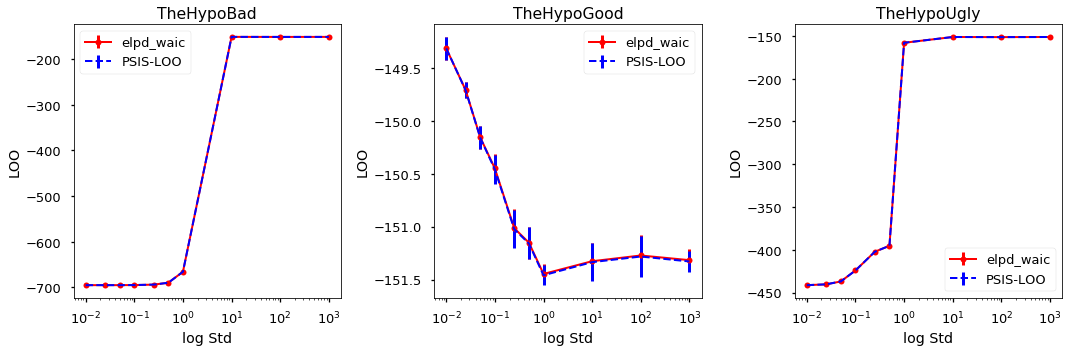

In [28]:
x=sd_values
y=elpd_waic_values

figure(figsize=(15, 5))
for i in range((y.shape[0])):
        subplot(1, (y.shape[0]), i + 1)  

        errorbar(x, mean(elpd_waic_values[i,:].reshape(-1, 4), axis=1), yerr=std(y[i,:].reshape(-1, 4), axis=1),
        elinewidth=3, ecolor='r',  linestyle='-', linewidth=2.0, fmt='r',
        marker='o',markersize=6,  mfc='r',  mec='red', label='elpd_waic')
        
        errorbar(x, mean(loo_values[i,:].reshape(-1, 4), axis=1), yerr=std(y[i,:].reshape(-1, 4), axis=1),
        elinewidth=3, ecolor='b',  linestyle='--', linewidth=2.0, fmt='b',
        marker='D',markersize=6,  mfc='none',  mec='b', label='PSIS-LOO')
            
        xscale('log')    
        xlabel("log Std")
        ylabel("LOO")
        title('The'+ Hypos[i])
        legend()
tight_layout()
show()   


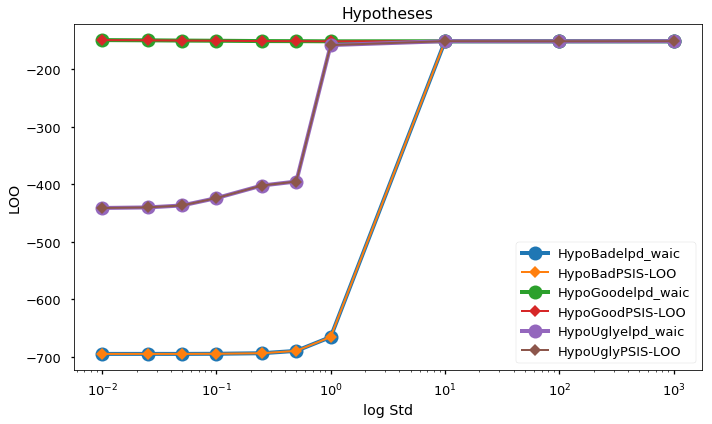

In [29]:
x=sd_values
y=elpd_waic_values

figure(figsize=(10,6))
for i in range((y.shape[0])):
        plot(x,mean(elpd_waic_values[i,:].reshape(-1, 4), axis=1),    linewidth=4.0, marker='o', markersize=14, fillstyle='full', label=Hypos[i]+'elpd_waic')
        plot(x,mean(loo_values[i,:].reshape(-1, 4), axis=1),  linewidth=2.0, marker='D', markersize=8, fillstyle='full', label=Hypos[i]+'PSIS-LOO')
        xscale('log')    
        xlabel("log Std")
        ylabel("LOO")
        title('Hypotheses')
        legend()
tight_layout()
show()   


Increasing  LOO vs std of a prior indicateds that it was a wrong hypothesis, 
because the smaller LOO, the better model.

Decreasing  LOO vs std of a prior indicateds that it was a correct hypothesis,
because the larger LOO, the worse model.

Note that for the both case, more uncerntanity on the prior, the larger effective parameter value.



In addition, the rate of increase in LOO vs std, for the case of havinh multiple parameters, can be used as a tool for sensitivity measuring.

# Run CV ADVI

In [30]:
tic=time.time()
!./RunCVHypos.sh 
print('total running time is: ', time.time()- tic, 'second')

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos
1  /  3  :  HypoBad
......................................................
creating models ...

--- Translating Stan model to C++ code ---
bin/stanc  /home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/HypoBad.stan --o=/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/HypoBad.hpp
Model name=HypoBad_model
Input file=/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/HypoBad.stan
Output file=/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/HypoBad.hpp
DIAGNOSTIC(S) FROM PARSER:
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.


--- Linking C++ model ---
g++ -Wall -I . -isystem stan/lib/stan_math/lib/eigen_3.3.3 -is

...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input10 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...

...removing output_advi3...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...sav

















































































[-695.21615705904742, -695.19996918195591, -695.16014379674198, -695.21144297158298, -695.20857667002554, -1070.2767999999999, -695.15753333251428, -695.18594099648635, -695.2347087900614, -695.77307873160339, -695.08207972849868, -695.28744502503969, -694.94663866020494, -695.54145526132868, -695.16225936685191, -695.04160960109971, -694.17536298609014, -694.12452238622791, -694.03133301299124, -693.98176024535201, -690.1229648507898, -690.02469905564044, -690.01506910367641, -690.04283999371262, -666.69521950211265, -666.39093762127186, -157.37735312007462, -666.49306537309303, -152.72861634235619, -151.83418506668852, -152.86822412414224, -152.18208098517101, -3158.5199999999991, -151.8918570561207, -158.38728055297628, -151.83804770966967, -151.81863460531721, -152.34950754699202, -151.92547936049303, -152.34084385314009]
Writing complete
...Computing PSIS terminated.
...................................

...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input9 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi 

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood
............................................................
['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_1-1.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_1-2.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_1-3.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_1-4.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_2-1.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_HypoGood/output_advi_HypoGood_2-2.csv', '/home/meysam/WorkLinux/PolynomialModelCompari

compiled models ...
/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos
......................................................
Running data_input1 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converg

4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
[-441.44941308360012, -441.48003730597645, -441.47586035742313, -441.29396200157436, -440.56540905917842, -440.39481114432698, -439.9099173426531, -440.68690908381092, -436.71954918519634, -436.73287377999236, -437.20616243558675, -436.52453683956014, -4524.6199999999981, -424.51265964542182, -424.40597285463548, -424.64075163387838, -402.6788452629861, -402.26250060980516, -402.13069114995704, -402.01380286870841, -395.79679436176411, -395.78724965310283, -396.04306580584432

In [31]:
allNpzFiles = sorted(glob.glob(cwd + "/*.npz"), key=numericalSort)

allNpzFiles

['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Out

In [32]:
Outputfiles= [x.rsplit('/')[-1].rsplit('.npz')[-2] for x in allNpzFiles if "Outfile" and "CV" in x]
Outputfiles

['Outfile_PSIS_CV_HypoBad',
 'Outfile_PSIS_CV_HypoGood',
 'Outfile_PSIS_CV_HypoUgly',
 'Outfile_WAIC_CV_HypoBad',
 'Outfile_WAIC_CV_HypoGood',
 'Outfile_WAIC_CV_HypoUgly']

In [33]:
Outfile_WAIC=[]
Outfile_PSIS=[]

elpd_waic_values=[]
p_waic_values=[]
loo_values=[]

for file in Outputfiles:
      if "WAIC" in file:
            Outfile_WAIC.append(file)
            npz=load(str(file)+'.npz')
            elpd_waic=npz['elpd_waic_values']
            p_waic=npz['p_waic_values']
            elpd_waic_values.append(elpd_waic)
            p_waic_values.append(p_waic)

      if "PSIS" in file:
            Outfile_PSIS.append(file)
            npz=load(str(file)+'.npz')
            loo=npz['loo_values']
            loo_values.append(loo)

In [34]:
waic_values = [i * -2 for i in elpd_waic_values]

In [35]:
elpd_waic_values=asarray(elpd_waic_values)
p_waic_values=asarray(p_waic_values)
loo_values=asarray(loo_values)

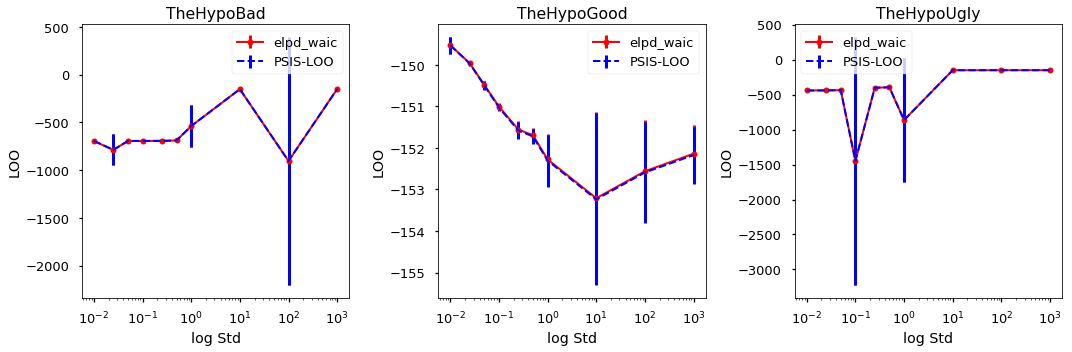

In [36]:
x=sd_values
y=elpd_waic_values

figure(figsize=(15, 5))
for i in range((y.shape[0])):
        subplot(1, (y.shape[0]), i + 1)  

        errorbar(x, mean(elpd_waic_values[i,:].reshape(-1, 4), axis=1), yerr=std(y[i,:].reshape(-1, 4), axis=1),
        elinewidth=3, ecolor='r',  linestyle='-', linewidth=2.0, fmt='r',
        marker='o',markersize=6,  mfc='r',  mec='red', label='elpd_waic')
        
        errorbar(x, mean(loo_values[i,:].reshape(-1, 4), axis=1), yerr=std(y[i,:].reshape(-1, 4), axis=1),
        elinewidth=3, ecolor='b',  linestyle='--', linewidth=2.0, fmt='b',
        marker='D',markersize=6,  mfc='none',  mec='b', label='PSIS-LOO')
            
        xscale('log')    
        xlabel("log Std")
        ylabel("LOO")
        title('The'+ Hypos[i])
        legend()
tight_layout()
show()   


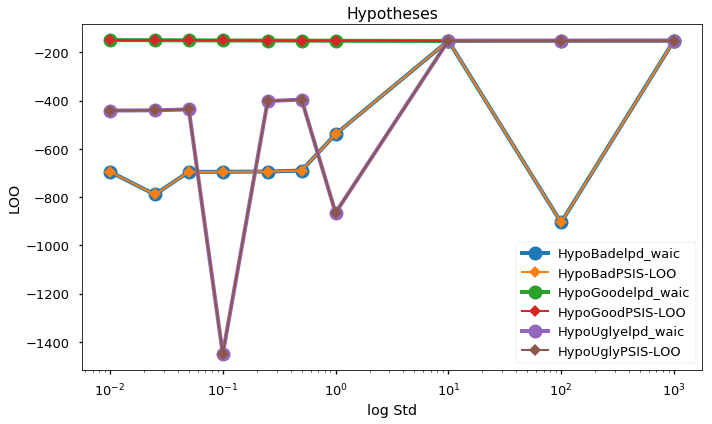

In [37]:
x=sd_values
y=elpd_waic_values

figure(figsize=(10,6))
for i in range((y.shape[0])):
        plot(x,mean(elpd_waic_values[i,:].reshape(-1, 4), axis=1),    linewidth=4.0, marker='o', markersize=14, fillstyle='full', label=Hypos[i]+'elpd_waic')
        plot(x,mean(loo_values[i,:].reshape(-1, 4), axis=1),  linewidth=2.0, marker='D', markersize=8, fillstyle='full', label=Hypos[i]+'PSIS-LOO')
        xscale('log')    
        xlabel("log Std")
        ylabel("LOO")
        title('Hypotheses')
        legend()
tight_layout()
show()   


This means if I take sd=100, the mu value of prior doeas not matter what the prior is!

**Now we use Hypos.stan to sweep on both mu and sd**

# Generate SweepData 2D  (mu,sd) to run Stan 

In [38]:
cwd = os.getcwd()
cwd

'/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos'

In [39]:
sd_value=0.0
mu_value=0.0

In [40]:
data_dict= {'nt': nt_obs, 'sd_value': sd_value,  'mu_value': mu_value, 't': t_obs, 'yobs': yobs}


nd=[]
npz = {'nd': nd}
npz.update(data_dict)

savez('data_input2D.npz', **npz)
savez('data_input2D.R.npz', **npz)
pystan.stan_rdump(data_dict, 'data_input2D.R')

In [41]:
filename = "data_input2D"

if filename in os.listdir(cwd):
    print('Directory Exists')

if not os.path.exists(os.path.join(cwd, filename)):
    try:
        os.mkdir(os.path.join(cwd, filename))
    except OSError as exception: 
        if exception.errno != errno.EEXIST:
            raise

In [42]:
cwd_datainput= os.path.join(cwd, filename)

In [43]:
npz.update(data_dict)

sd_values=array([0.01, 0.025, 0.05, 0.1,  0.25,  0.5,   1.0 ,  10., 100.0, 1000.0])
#mu_values=array([-10., -5., 0., 5., 10., 15])
mu_values=linspace(-5.0, 10.0, num=16)



idx_R=0
for i in range(1,len(mu_values)+1):
     for j in range(1,len(sd_values)+1):
                npz.update({"mu_value": mu_values[i-1]})
                npz.update({"sd_value": sd_values[j-1]})
                print ('mu_value=', mu_values[i-1])
                print ('sd_value=', sd_values[j-1])
                idx_R= idx_R+1
                print  ('idx=', (idx_R))
                "data_input2D" + str(idx_R) + ".R.npz"
                "data_input2D%s.R.npz" % idx_R
                file_name_npz="data_input2D{}.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_npz), **npz)
                
                file_name_Rnpz="data_input2D{}.R.npz".format(idx_R)
                savez(os.path.join(cwd_datainput, file_name_Rnpz), **npz)
                
                file_name_R="data_input2D{}.R".format(idx_R)
                os.chdir(cwd_datainput)
                pystan.stan_rdump( npz, file_name_R)

mu_value= -5.0
sd_value= 0.01
idx= 1
mu_value= -5.0
sd_value= 0.025
idx= 2
mu_value= -5.0
sd_value= 0.05
idx= 3
mu_value= -5.0
sd_value= 0.1
idx= 4
mu_value= -5.0
sd_value= 0.25
idx= 5
mu_value= -5.0
sd_value= 0.5
idx= 6
mu_value= -5.0
sd_value= 1.0
idx= 7
mu_value= -5.0
sd_value= 10.0
idx= 8
mu_value= -5.0
sd_value= 100.0
idx= 9
mu_value= -5.0
sd_value= 1000.0
idx= 10
mu_value= -4.0
sd_value= 0.01
idx= 11
mu_value= -4.0
sd_value= 0.025
idx= 12
mu_value= -4.0
sd_value= 0.05
idx= 13
mu_value= -4.0
sd_value= 0.1
idx= 14
mu_value= -4.0
sd_value= 0.25
idx= 15
mu_value= -4.0
sd_value= 0.5
idx= 16
mu_value= -4.0
sd_value= 1.0
idx= 17
mu_value= -4.0
sd_value= 10.0
idx= 18
mu_value= -4.0
sd_value= 100.0
idx= 19
mu_value= -4.0
sd_value= 1000.0
idx= 20
mu_value= -3.0
sd_value= 0.01
idx= 21
mu_value= -3.0
sd_value= 0.025
idx= 22
mu_value= -3.0
sd_value= 0.05
idx= 23
mu_value= -3.0
sd_value= 0.1
idx= 24
mu_value= -3.0
sd_value= 0.25
idx= 25
mu_value= -3.0
sd_value= 0.5
idx= 26
mu_value= -3.0
sd_va

In [44]:
%cd ..

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos


# Run IC 2D

In [45]:
!ls

checking_converged_advi.py    HypoGood.stan.pkl
checking_converged_hmc.py     Hypos2D.stan
checking_converged_opt.py     HypoUgly
cmdstan			      HypoUgly.hpp
ComputeIC_Hypos_csv.py	      HypoUgly.stan
ComputeIC_Hypos.py	      HypoUgly.stan.pkl
ComputePSIS_Hypos_csv.py      Outfile_PSIS_CV_HypoBad.npz
ComputePSIS_Hypos.py	      Outfile_PSIS_CV_HypoGood.npz
data_input		      Outfile_PSIS_CV_HypoUgly.npz
data_input2D		      Outfile_PSIS_HypoBad.npz
data_input2D.npz	      Outfile_PSIS_HypoGood.npz
data_input2D.R		      Outfile_PSIS_HypoUgly.npz
data_input2D.R.npz	      Outfile_WAIC_CV_HypoBad.npz
data_input.npz		      Outfile_WAIC_CV_HypoGood.npz
data_input.R		      Outfile_WAIC_CV_HypoUgly.npz
data_input.R.npz	      Outfile_WAIC_HypoBad.npz
data_output_CV_advi_HypoBad   Outfile_WAIC_HypoGood.npz
data_output_CV_advi_HypoGood  Outfile_WAIC_HypoUgly.npz
data_output_CV_advi_HypoUgly  parse_csv.py
data_output_IC_HypoBad	      PolynomialInferHypos.ipynb
data_output_IC_HypoGood       __pycache_

In [46]:
tic=time.time()
!./RunICHypos2D.sh 
print('total running time is: ', time.time()- tic, 'second')

1  /  1  :  Hypos2D
...Running Pystan...
Running data_input2D1 started...
Running chain1 started...
..............................................
creating model ...
DIAGNOSTIC(S) FROM PARSER:
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.
Warning (non-fatal): assignment operator <- deprecated in the Stan language; use = instead.

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2eb9022b2a18720275fb750daca5fc04 NOW.
INFO:pystan:OS: linux, Python: 3.6.3 |Anaconda, Inc.| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0], Cython 0.26.1
Compiling /tmp/tmpl9tzhnxn/stanfit4anon_model_2eb9022b2a18720275fb750daca5fc04_4098746127724512782.pyx because it changed.
[1/1] Cythonizing /tmp/tmpl9tzhnxn/stanfit4anon_model_2eb9022b2a18720275fb750daca5fc04_4098746127724512782.pyx
building 'stanfit4anon_model_2eb9022b2a18720275fb750daca5fc04_4098746127724512782' exte

g++ -pthread -shared -B /home/meysam/anaconda3/compiler_compat -L/home/meysam/anaconda3/lib -Wl,-rpath=/home/meysam/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ /tmp/tmpl9tzhnxn/tmp/tmpl9tzhnxn/stanfit4anon_model_2eb9022b2a18720275fb750daca5fc04_4098746127724512782.o -L/home/meysam/anaconda3/lib -lpython3.6m -o /tmp/tmpl9tzhnxn/stanfit4anon_model_2eb9022b2a18720275fb750daca5fc04_4098746127724512782.cpython-36m-x86_64-linux-gnu.so
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.044395 seconds (Warm-up)
               0.1061 seconds (Sampling)
               0.150495 seconds (Total)

..saving...
..........................................

...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.036554 seconds (Warm-up)
               0.107285 seconds (Sampling)
               0.143839 seconds (Total)

..saving...
..............................................
Running data_input2D4 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iterat

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.06808 seconds (Warm-up)
               0.150121 seconds (Sampling)
               0.218201 seconds (Total)

..saving...
..............................................
Running data_input2D7 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.05984 seconds (Warm-up)
               0.129967 seconds (Sampling)
               0.189807 seconds (Total)

..saving...
.............................................

..............................................
Running data_input2D10 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.059455 seconds (Warm-up)
               0.129268 seconds (Sampling)
               0.188723 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 3.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.3

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.035862 seconds (Warm-up)
               0.112239 seconds (Sampling)
               0.148101 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037067 seconds (Warm-up)
               0.103213 seconds (Sampling)
               0.14028 seconds (Total)

..saving...
..............................................
Running chain3 started...
....

..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.071093 seconds (Warm-up)
               0.140377 seconds (Sampling)
               0.21147 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectati

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.076346 seconds (Warm-up)
               0.12627 seconds (Sampling)
               0.202616 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.059863 seconds (Warm-up)
               0.142944 seconds (Sampling)
               0.202807 seconds (Total)

..saving...
..............................................
Running chain4 started...
....

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.03686 seconds (Warm-up)
               0.156644 seconds (Sampling)
               0.193504 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Informational Message: The current Metropolis proposal is about to be rejected because 

Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.047106 seconds (Warm-up)
               0.108663 seconds (Sampling)
               0.155769 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.059398 seconds (Warm-up)
               0.127668 seconds (Sampling)
               0.187066 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.064356 seconds (Warm-up)
               0.132782 seconds (Sampling)
               0.197138 seconds (Total)

..saving...
..............................................
Running chain4 started...
...

Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 3.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.074432 seconds (Warm-up)
               0.11808 seconds (Sampling)
               0.192512 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037418 seconds (Warm-up)
               0.10431 seconds (Sampling)
               0.141728 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037797 seconds (Warm-up)
               0.113566 seconds (Sampling)
               0.151363 seconds (Total)

..saving...
..............................................
Running data_input2D35 started...
Running chain1 started...
...........

Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.063305 seconds (Warm-up)
               0.142192 seconds (Sampling)
               0.205497 seconds (Total)

..saving...
..............................................
Running data_input2D38 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordin

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.059929 seconds (Warm-up)
               0.131681 seconds (Sampling)
               0.19161 seconds (Total)

..saving...
..............................................
Running data_input2D41 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.042381 seconds (Warm-up)
               0.095193 seconds (Sampling)
               0.137574 seconds (Total)

..saving...
...........................................

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.035416 seconds (Warm-up)
               0.094345 seconds (Sampling)
               0.129761 seconds (Total)

..saving...
..............................................
Running data_input2D44 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037462 seconds (Warm-up)
               0.096395 seconds (Sampling)
               0.133857 seconds (Total)

..saving...
..........................................

..............................................
Running data_input2D47 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.066235 seconds (Warm-up)
               0.118341 seconds (Sampling)
               0.184576 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 3.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.098677 seconds (Warm-up)
               0.149055 seconds (Sampling)
               0.247732 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
I

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.034227 seconds (Warm-up)
               0.113002 seconds (Sampling)
               0.147229 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.034825 seconds (Warm-up)
               0.098962 seconds (Sampling)
               0.133787 seconds (Total)

..saving...
..............................................
Running chain3 started...
...

Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.062885 seconds (Warm-up)
               0.097393 seconds (Sampling)
               0.160278 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.062834 seconds (Warm-up)
               0.141645 seconds (Sampling)
               0.204479 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.06803 seconds (Warm-up)
               0.102192 seconds (Sampling)
               0.170222 seconds (Total)

..saving...
..............................................
Running chain4 started...
.......

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037388 seconds (Warm-up)
               0.103805 seconds (Sampling)
               0.141193 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
I

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.074697 seconds (Warm-up)
               0.16626 seconds (Sampling)
               0.240957 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.056633 seconds (Warm-up)
               0.146926 seconds (Sampling)
               0.203559 seconds (Total)

..saving...
..............................................
Running chain4 started...
....

Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.06321 seconds (Warm-up)
               0.109471 seconds (Sampling)
               0.172681 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (War

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.042421 seconds (Warm-up)
               0.108833 seconds (Sampling)
               0.151254 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unkown file name' at line 28)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.037597 seconds (Warm-up)
               0.096463 seconds (Sampling)
               0.13406 seconds (Total)

..saving...
..............................................
Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.040331 seconds (Warm-up)
               0.106028 seconds (Sampling)
               0.146359 seconds (Total)

..saving...
..............................................
Running chain4 started...
.............................................

Running chain3 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.060993 seconds (Warm-up)
               0.127083 seconds (Sampling)
               0.188076 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.065301 seconds (Warm-up)
               0.116861 seconds (Sampling)
               0.182162 seconds (Total)

..saving...
..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 3.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.105381 seconds (Warm-up)
               0.133465 seconds (Sampling)
               0.238846 seconds (Total)

..saving...
..............................................
Running data_input2D81 starte

..............................................
Running chain4 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.038988 seconds (Warm-up)
               0.107794 seconds (Sampling)
               0.146782 seconds (Total)

..saving...
..............................................
Running data_input2D84 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2


Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.064726 seconds (Warm-up)
               0.139595 seconds (Sampling)
               0.204321 seconds (Total)

..saving...
..............................................
Running data_input2D87 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 100

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.058369 seconds (Warm-up)
               0.142041 seconds (Sampling)
               0.20041 seconds (Total)

..saving...
..............................................
Running data_input2D90 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.075502 seconds (Warm-up)
               0.133254 seconds (Sampling)
               0.208756 seconds (Total)

..saving...
...........................................

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.039692 seconds (Warm-up)
               0.095173 seconds (Sampling)
               0.134865 seconds (Total)

..saving...
..............................................
Running data_input2D93 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Itera

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.062012 seconds (Warm-up)
               0.123159 seconds (Sampling)
               0.185171 seconds (Total)

..saving...
..............................................
Running data_input2D96 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.051486 seconds (Warm-up)
               0.117051 seconds (Sampling)
               0.168537 seconds (Total)

..saving...
.............................................

Running data_input2D99 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.057761 seconds (Warm-up)
               0.135068 seconds (Sampling)
               0.192829 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.042887 seconds (Warm-up)
               0.113912 seconds (Sampling)
               0.156799 seconds (Total)

..saving...
..............................................
Running data_input2D102 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.050983 seconds (Warm-up)
               0.111793 seconds (Sampling)
               0.162776 seconds (Total)

..saving...
..............................................
Running chain2 started...
.........

Running data_input2D105 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.05789 seconds (Warm-up)
               0.107599 seconds (Sampling)
               0.165489 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.055842 seconds (Warm-up)
               0.146442 seconds (Sampling)
               0.202284 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.072357 seconds (Warm-up)
               0.131031 seconds (Sampling)
               0.203388 seconds (Total)

..saving...
..............................................
Running chain3 started...
...

Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unkown file name' at line 28)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.061673 seconds (Warm-up)
               0.110033 second

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.040431 seconds (Warm-up)
               0.144271 seconds (Sampling)
               0.184702 seconds (Total)

..saving...
..............................................
Running data_input2D114 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.05319 seconds (Warm-up)
               0.11264 seconds (Sampling)
               0.16583 seconds (Total)

..saving...
..............................................
Running chain2 started...
...............

..............................................
Running data_input2D117 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.065227 seconds (Warm-up)
               0.107138 seconds (Sampling)
               0.172365 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.056507 seconds (Warm-up)
               0.112253 seconds (Sampling)
               0.16876 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)

..............................................
Running data_input2D123 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.038413 seconds (Warm-up)
               0.110031 seconds (Sampling)
               0.148444 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take

...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.063583 seconds (Warm-up)
               0.140762 seconds (Sampling)
               0.204345 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Samp

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.057628 seconds (Warm-up)
               0.112218 seconds (Sampling)
               0.169846 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.05896 seconds (Warm-up)
               0.137258 seconds (Sampling)
               0.196218 seconds (Total)

..saving...
..............................................
Running chain3 started...
.......

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.041854 seconds (Warm-up)
               0.110951 seconds (Sampling)
               0.152805 seconds (Total)

..saving...
..............................................
Running data_input2D132 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.034095 seconds (Warm-up)
               0.098385 seconds (Sampling)
               0.13248 seconds (Total)

..saving...
.............................................

...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.034886 seconds (Warm-up)
               0.097569 seconds (Sampling)
               0.132455 seconds (Total)

..saving...
..............................................
Running data_input2D135 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iter

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.071245 seconds (Warm-up)
               0.134417 seconds (Sampling)
               0.205662 seconds (Total)

..saving...
..............................................
Running data_input2D138 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.057561 seconds (Warm-up)
               0.140592 seconds (Sampling)
               0.198153 seconds (Total)

..saving...
.........................................

Running data_input2D141 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unkown file name' at line 28)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.040493 seconds (Warm-up

Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.032631 seconds (Warm-up)
               0.126218 seconds (Sampling)
               0.158849 seconds (Total)

..saving...
..............................................
Running data_input2D144 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.035729 seconds (Warm-up)
               0.11139 seconds (Sampling)
               0.147119 seconds (Total)

..saving...
..............................................
Running chain2 started...
..........

Running data_input2D147 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.063507 seconds (Warm-up)
               0.123471 seconds (Sampling)
               0.186978 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Adjust your expectations accordi

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.064656 seconds (Warm-up)
               0.133783 seconds (Sampling)
               0.198439 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.062709 seconds (Warm-up)
               0.117376 seconds (Sampling)
               0.180085 seconds (Total)

..saving...
..............................................
Running chain3 started...
...

Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.039084 seconds (Warm-up)
               0.103689 seconds (Sampling)
               0.142773 seconds (Total)

..saving...
..............................................
Running data_input2D153 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.03275 seconds (Warm-up)
               0.094188 seconds (Sampling)
               0.126938 seconds (Total)

..saving...
.............................................

..............................................
Running data_input2D156 started...
Running chain1 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.060603 seconds (Warm-up)
               0.130742 seconds (Sampling)
               0.191345 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.

creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 2e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.06841 seconds (Warm-up)
               0.124044 seconds (Sampling)
               0.192454 seconds (Total)

..saving...
..............................................
Running chain2 started...
..............................................
creating model ...
creating model done.
loading data ...
...sampling hmc...

Gradient evaluation took 1.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 251 / 1000 [ 25%]  (Sampling)
Iteration: 750 / 1000 [ 75%]  (Sampling)
It

4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D
............................................................
['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output1-1.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output1-2.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output1-3.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output1-4.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output2-1.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output2-2.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_IC_Hypos2D/output2-3.npz', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferH

...Computing PSIS terminated.
..................................................................................................
Jobe done!
total running time is:  676.1753237247467 second


In [47]:
!ls

checking_converged_advi.py    Hypos2D.stan
checking_converged_hmc.py     Hypos2D.stan.pkl
checking_converged_opt.py     HypoUgly
cmdstan			      HypoUgly.hpp
ComputeIC_Hypos_csv.py	      HypoUgly.stan
ComputeIC_Hypos.py	      HypoUgly.stan.pkl
ComputePSIS_Hypos_csv.py      Outfile_PSIS_CV_HypoBad.npz
ComputePSIS_Hypos.py	      Outfile_PSIS_CV_HypoGood.npz
data_input		      Outfile_PSIS_CV_HypoUgly.npz
data_input2D		      Outfile_PSIS_HypoBad.npz
data_input2D.npz	      Outfile_PSIS_HypoGood.npz
data_input2D.R		      Outfile_PSIS_Hypos2D.npz
data_input2D.R.npz	      Outfile_PSIS_HypoUgly.npz
data_input.npz		      Outfile_WAIC_CV_HypoBad.npz
data_input.R		      Outfile_WAIC_CV_HypoGood.npz
data_input.R.npz	      Outfile_WAIC_CV_HypoUgly.npz
data_output_CV_advi_HypoBad   Outfile_WAIC_HypoBad.npz
data_output_CV_advi_HypoGood  Outfile_WAIC_HypoGood.npz
data_output_CV_advi_HypoUgly  Outfile_WAIC_Hypos2D.npz
data_output_IC_HypoBad	      Outfile_WAIC_HypoUgly.npz
data_output_IC_HypoGood       p

In [48]:
allNpzFiles = sorted(glob.glob(cwd + "/*.npz"), key=numericalSort)

allNpzFiles

['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_Hypos2D.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile

In [49]:
Outputfiles= [x.rsplit('/')[-1].rsplit('.npz')[-2] for x in allNpzFiles if "Outfile_" and "Hypos2D" in x]
Outputfiles

['Outfile_PSIS_Hypos2D', 'Outfile_WAIC_Hypos2D']

In [50]:
Hypos=['Hypos']

In [51]:
data_inputOutfile_WAIC=[]
Outfile_PSIS=[]

elpd_waic_values=[]
p_waic_values=[]
loo_values=[]

for file in Outputfiles:
      if "WAIC" in file:
            Outfile_WAIC.append(file)
            npz=load(str(file)+'.npz')
            elpd_waic=npz['elpd_waic_values']
            p_waic=npz['p_waic_values']
            elpd_waic_values.append(elpd_waic)
            p_waic_values.append(p_waic)

      if "PSIS" in file:
            Outfile_PSIS.append(file)
            npz=load(str(file)+'.npz')
            loo=npz['loo_values']
            loo_values.append(loo)

In [52]:
waic_values = [i * -2 for i in elpd_waic_values]

In [53]:
elpd_waic_values=asarray(elpd_waic_values)
p_waic_values=asarray(p_waic_values)
loo_values=asarray(loo_values)

In [54]:
p_waic_values.shape

(1, 640)

In [55]:
p_waic_values_mean=mean(p_waic_values.reshape(-1, 4), axis=1)
elpd_waic_values_mean=mean(elpd_waic_values.reshape(-1, 4), axis=1)
loo_values_mean=mean(loo_values.reshape(-1, 4), axis=1)

In [56]:
p_waic_values_mean.shape

(160,)

In [57]:
p_waic_values_mean.reshape(len(mu_values),len(sd_values)).shape

(16, 10)

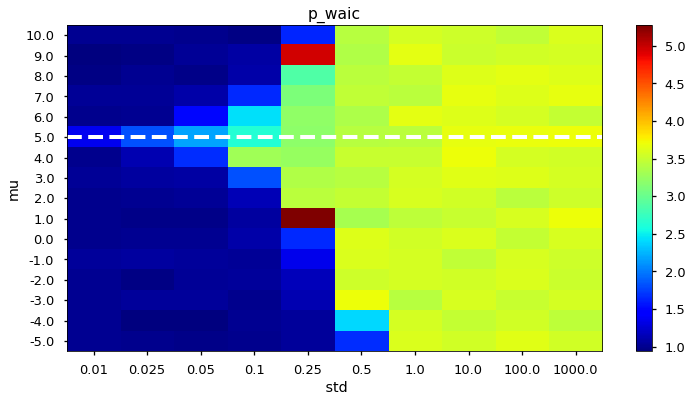

In [58]:
figure(figsize=(12,6))
imshow(p_waic_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
colorbar()
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=4, color = 'w', linestyle='--' )
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('p_waic')
show()

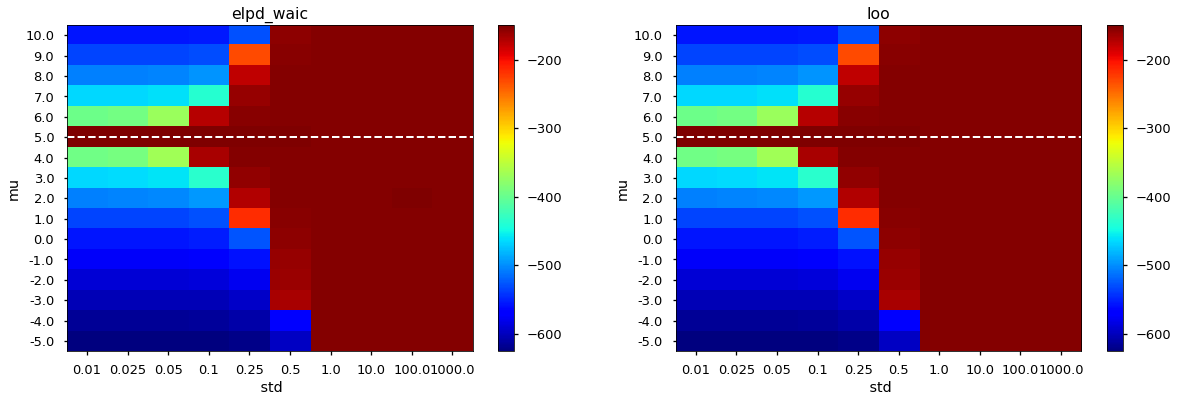

In [59]:
figure(figsize=(20,6))
subplot(121)
imshow(elpd_waic_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
colorbar()
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=2, color = 'w', linestyle='--' )
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('elpd_waic')

subplot(122)
imshow(loo_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=2, color = 'w', linestyle='--' )
colorbar()
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('loo')

show()

This means if I take sd=100, the mu value of prior doeas not matter what the prior is!

# Run CV ADVI 2D

In [78]:
tic=time.time()
!./RunCVHypos2D.sh 
print('total running time is: ', time.time()- tic, 'second')

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos
1  /  1  :  Hypos2D
......................................................
creating models ...
make: '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Hypos2D' is up to date.
compiled models ...
/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos
......................................................
Running data_input2D1 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...

...removing output_advi3...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of adv


...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D13 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Runnin

...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D25 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...s


...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D37 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D38 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged

...checking convergence of advi4...

...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D49 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...

...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged

...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D61 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all ch

...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D72 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...

...removing output_advi3...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D73 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
.

...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D84 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D85 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged 

...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D96 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged

...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...

...removing output_advi3...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...

...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D108 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...

...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...

...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D120 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running AD

...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D132 started...
...Running ADVI1 started...
...checking convergence of advi1...

...removing output_advi1...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
a

...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...

...removing output_advi3...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D144 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running ADVI2 started...
...checking convergence of advi2...

...removing output_advi2...
...Running AD

advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...

...removing output_advi4...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D155 started...
...Running ADVI1 started...
...checking convergence of advi1...
advi converged
ADVI converged for run1
...saving output for  advi1...
...Running ADVI2 started...
...checking convergence of advi2...
advi converged
ADVI converged for run2
...saving output for  advi2...
...Running ADVI3 started...
...checking convergence of advi3...
advi converged
ADVI converged for run3
...saving output for  advi3...
...Running ADVI4 started...
...checking convergence of advi4...
advi converged
ADVI converged for run4
...saving output for  advi4...
ADVI converged for all chains.
Running data_input2D156 started...
...Running ADVI1 started...
...chec

4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters

4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
4 parameters
[-625.8448808195086, -625.87911381553545, -625.98601249051148, -625.72596318878834, -625.90504002131922, -625.8698961547592, -625.82563046556118, -625.77368582578617, -625.81234379933221, -625.67051469390674, -625.59009605911012, -625.75763775274356, -625.12052323862542, -625.36712409103177, -625.33893141146314, -624.94453160317664, -620.81303376271296, -620.52373952552796, -620.7565250930279, -620.80661047065951, -597.19934092631092, -597.19955207325893, -597.15976735422453, -597.14663473649341, -153.1833268669144, -153.00696689911464, -152.93974915959674, -153.03565869541487, -152.13568866283919, -151.65434037105786, -151.89575447788377, -151.84640951760176, -152.22028369408949, -151.68065743199691, -151.96218498761789, -151.67233976727945, -151.51020066812276, -153.06427999739498, -151.82615864836868, -232.30213224314539, -615.7963259681203, -615.36494181224282, -615.

/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D
............................................................
['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_1-1.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_1-2.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_1-3.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_1-4.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_2-1.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/data_output_CV_advi_Hypos2D/output_advi_Hypos2D_2-2.csv', '/home/meysam/WorkLinux/PolynomialModelComparision/Polynomi

total running time is:  1338.8022112846375 second


In [79]:
allNpzFiles = sorted(glob.glob(cwd + "/*.npz"), key=numericalSort)

allNpzFiles

['/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_CV_Hypos2D.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoGood.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_HypoUgly.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_PSIS_Hypos2D.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_WAIC_CV_HypoBad.npz',
 '/home/meysam/WorkLinux/PolynomialModelComparision/PolynomialInferHypos/Outfile_

In [80]:
Outputfiles= [x.rsplit('/')[-1].rsplit('.npz')[-2] for x in allNpzFiles if ("Outfile_"  and "CV_Hypos2D") in x]
Outputfiles

['Outfile_PSIS_CV_Hypos2D', 'Outfile_WAIC_CV_Hypos2D']

In [81]:
Hypos=['Hypos']

In [82]:
data_inputOutfile_WAIC=[]
Outfile_PSIS=[]

elpd_waic_values=[]
p_waic_values=[]
loo_values=[]

for file in Outputfiles:
      if "WAIC" in file:
            Outfile_WAIC.append(file)
            npz=load(str(file)+'.npz')
            elpd_waic=npz['elpd_waic_values']
            p_waic=npz['p_waic_values']
            elpd_waic_values.append(elpd_waic)
            p_waic_values.append(p_waic)

      if "PSIS" in file:
            Outfile_PSIS.append(file)
            npz=load(str(file)+'.npz')
            loo=npz['loo_values']
            loo_values.append(loo)

In [83]:
waic_values = [i * -2 for i in elpd_waic_values]

In [84]:
elpd_waic_values=asarray(elpd_waic_values)
p_waic_values=asarray(p_waic_values)
loo_values=asarray(loo_values)

In [85]:
p_waic_values.shape

(1, 640)

In [86]:
p_waic_values_mean=mean(p_waic_values.reshape(-1, 4), axis=1)
elpd_waic_values_mean=mean(elpd_waic_values.reshape(-1, 4), axis=1)
loo_values_mean=mean(loo_values.reshape(-1, 4), axis=1)

In [87]:
p_waic_values_mean.shape

(160,)

In [88]:
p_waic_values_mean.reshape(len(mu_values),len(sd_values)).shape

(16, 10)

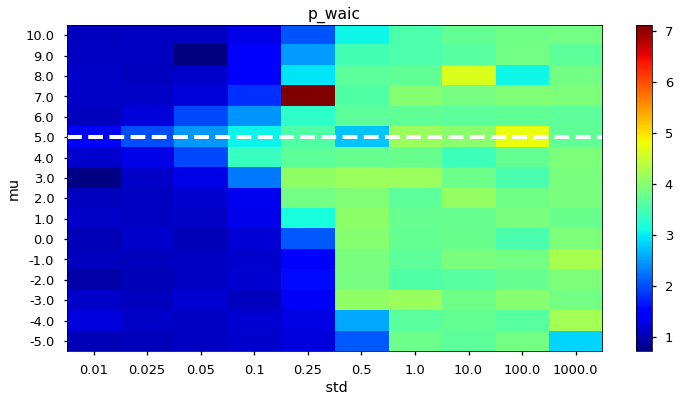

In [89]:
figure(figsize=(12,6))
imshow(p_waic_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
colorbar()
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=4, color = 'w', linestyle='--' )
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('p_waic')
show()

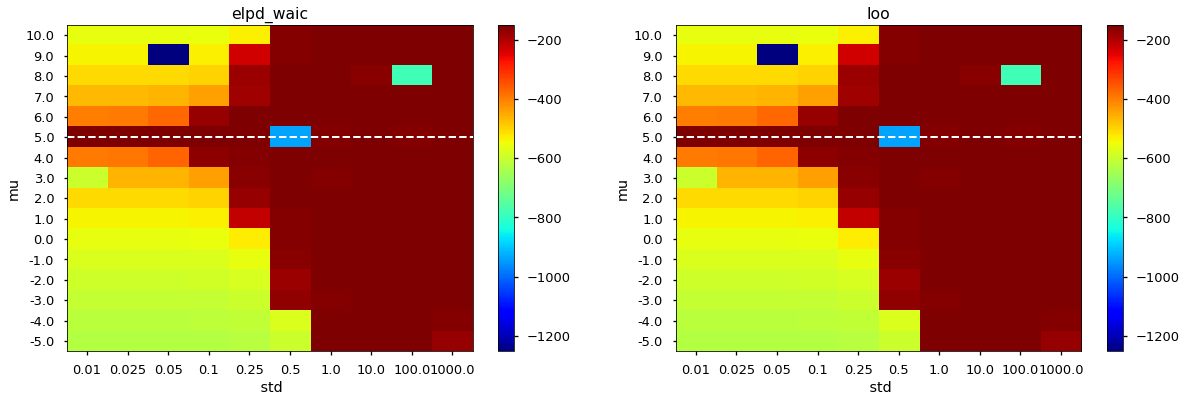

In [90]:
figure(figsize=(20,6))
subplot(121)
imshow(elpd_waic_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
colorbar()
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=2, color = 'w', linestyle='--' )
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('elpd_waic')

subplot(122)
imshow(loo_values_mean.reshape(len(mu_values),len(sd_values)), aspect='auto',  origin='lower', cmap='jet')
plt.hlines(y=10., xmin=-.5, xmax=9.5, linewidth=2, color = 'w', linestyle='--' )
colorbar()
yticks(r_[:len(mu_values)], mu_values);
xticks(r_[:len(sd_values)], sd_values);
xlabel(" std")
ylabel("mu")
title('loo')

show()